###Modelo de Neurona Perceptrón para clasificación

In [239]:
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing as pp
import pandas as pd
import numpy as np
import csv
import random as rnd
import matplotlib.pyplot as plt
import random as rnd
%matplotlib inline

#### 1) Se cargan el set de datos y se asigna el porcentaje de entrenamiento

In [240]:
data = pd.read_csv("regLin4.csv")
print(data.head())
print(data.describe())

           X  y
0  71.130300  0
1  36.872465  0
2  56.508402  0
3  78.120147  0
4  65.575073  0
                 X            y
count  1029.000000  1029.000000
mean     48.589544     0.325559
std      29.227099     0.468811
min       0.110611     0.000000
25%      22.625683     0.000000
50%      46.887538     0.000000
75%      74.247858     1.000000
max      99.983493     1.000000


In [241]:
X_train, X_test, Y_train, Y_test = train_test_split(data[["X"]],data["y"], train_size=0.75)
print len(X_train), len(X_test)

771 258


#### 2) Transformación de los datos

In [242]:
ScaleX = pp.StandardScaler()
ScaleX.fit(X_train)
X_train = pd.DataFrame(data = ScaleX.transform(X_train), columns = ['X'])
print X_train.head()

          X
0  1.174977
1 -0.236886
2 -1.025941
3 -1.360057
4  1.420909


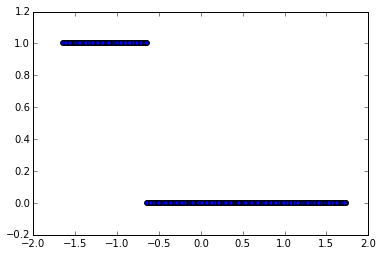

In [210]:
plt.scatter(X_train,Y_train)

#### 3) Se definen las funciones entrena (con regularicación lambda) y el actualizador de las w's

In [243]:
def transferencia(w0,w,X):
    suma = w0
    for i in range(len(w)):
        suma = suma + w[i]*X.iloc[i]
    if suma > 0:
        indica = 1
    else:
        indica = 0
    return indica

In [244]:
def entrena(w0,w,X,Y,eta):
    for i in range(len(X)): 
        y_indica = transferencia(w0,w,X.iloc[i])
        error = Y.iloc[i] - y_indica
        w0 = w0 + eta*error
        for j in range(len(X.columns)):
            w[j] = w[j] + eta*error*X.iloc[i,j]
    return w0,w

####4) Valores iniciales y cálculo del umbral para las iteraciones

In [248]:
w0 = 0.5 #rnd.random()
w = [0.2] #[rnd.random()]
eta = 0.005

In [249]:
print (w0,w,eta)

(0.5, [0.2], 0.005)


In [250]:
new_w0, new_w = entrena(w0,w,X_train,Y_train,eta)
umbral = -new_w0/new_w[0]
print(new_w0, new_w, umbral)

(-0.02000000000000038, [-0.03293462042090297], -0.60726371655119371)


####5) Iteramos en el recorrido de X para las estimaciones de Y

In [251]:
Y_hat = []
for i in range(len(X_train)):
    suma = new_w0 + new_w[0]*X_train.iloc[i,0]
    if suma > 0:
        indica = 1
    else:
        indica = 0
    Y_hat.append(indica)

####6) Visualización de clasificación

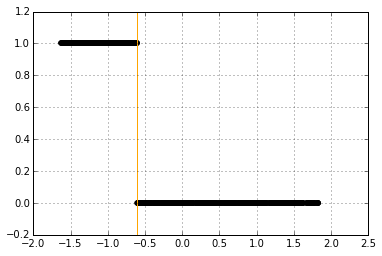

In [253]:
plt.scatter(X_train, Y_hat, color = "black")
plt.axvline(umbral, color="orange")
plt.grid()